**Installing Required Libraries**

In [1]:
!pip install mlxtend

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
import os

**Uploading the ZIP File and  Unzipping the File**

In [3]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving online+retail.zip to online+retail.zip


In [4]:
import zipfile
import os

zip_path = "/content/online+retail.zip"
extract_path = "/content/extracted_files"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)

Files extracted to: /content/extracted_files


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# List of all files in the extracted folder
files = os.listdir(extract_path)
print("Extracted Files:", files)

Extracted Files: ['Online Retail.xlsx']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Loading the Dataset**

In [6]:
dataset_path = os.path.join(extract_path, "Online Retail.xlsx")

data = pd.read_excel(dataset_path)
print("Dataset Loaded:")
print(data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Loaded:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [23]:
# Exploring the Dataset
print("Dataset Shape:", data.shape)
print("Dataset Information:")
data.info()

print("First Few Rows:")
print(data.head())

Dataset Shape: (397884, 10)
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalSales   397884 non-null  float64       
 9   Month        397884 non-null  period[M]     
dtypes: datetime64[ns](1), float64(3), int64(1), object(4), period[M](1)
memory usage: 33.4+ MB
First Few Rows:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Preprocessing**

In [9]:
# Handling missing values
print(f"Missing values before cleaning:\n{data.isnull().sum()}")
data = data.dropna(subset=['CustomerID', 'Description'])  # Dropping rows with missing CustomerID or Description
print(f"Missing values after cleaning:\n{data.isnull().sum()}")

# Filtering out cancellations (i.e. InvoiceNo starting with 'C')
data = data[~data['InvoiceNo'].astype(str).str.startswith('C')]

# Removing negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Adding a total sales column
data['TotalSales'] = data['Quantity'] * data['UnitPrice']
print("Preprocessed Data Sample:")
print(data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Missing values after cleaning:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Preprocessed Data Sample:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalSales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     

**`Exploratory Data Analysis `**

In [10]:
print("Unique Products:", data["Description"].nunique())
print("Unique Customers:", data["CustomerID"].nunique())

Unique Products: 3877
Unique Customers: 4338


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data for Association Rule Mining**

In [11]:
# Creating a basket format
basket = data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket[basket > 0] = 1

print("Basket Format Sample:")
print(basket.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Basket Format Sample:
Description   4 PURPLE FLOCK DINNER CANDLES   50'S CHRISTMAS GIFT BAG LARGE  \
InvoiceNo                                                                     
536365                                  0.0                             0.0   
536366                                  0.0                             0.0   
536367                                  0.0                             0.0   
536368                                  0.0                             0.0   
536369                                  0.0                             0.0   

Description   DOLLY GIRL BEAKER   I LOVE LONDON MINI BACKPACK  \
InvoiceNo                                                       
536365                      0.0                           0.0   
536366                      0.0                           0.0   
536367                      0.0                           0.0   
536368                      0.0                           0.0   
536369                      0.0   

**Association Rule Mining**

In [12]:
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from scipy.sparse import csr_matrix

# sample of basket data
basket_sample = basket.sample(frac=0.1, random_state=42)

# Top 100 most frequent products
top_products = data['Description'].value_counts().head(100).index
basket_filtered = basket[top_products]

# Conversion of basket to a sparse matrix
basket_sparse = csr_matrix(basket_sample.values)

# FP-Growth to find frequent itemsets
frequent_itemsets_fp = fpgrowth(basket_sample, min_support=0.005, use_colnames=True)
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp.head())

# Generating association rules from the frequent itemsets
rules_fp = association_rules(frequent_itemsets_fp,num_itemsets=len(data),metric="lift", min_threshold=1)
print("Association Rules (FP-Growth):")
print(rules_fp.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets (FP-Growth):
    support                             itemsets
0  0.076093            (LUNCH BAG RED RETROSPOT)
1  0.043173             (JAM MAKING SET PRINTED)
2  0.029142   (PINK BLUE FELT CRAFT TRINKET BOX)
3  0.028063        (PACK OF 72 SKULL CAKE CASES)
4  0.023206  (SET OF 12 FAIRY CAKE BAKING CASES)
Association Rules (FP-Growth):
                  antecedents                           consequents  \
0   (LUNCH BAG RED RETROSPOT)                       (PARTY BUNTING)   
1             (PARTY BUNTING)             (LUNCH BAG RED RETROSPOT)   
2   (LUNCH BAG RED RETROSPOT)            (REGENCY CAKESTAND 3 TIER)   
3  (REGENCY CAKESTAND 3 TIER)             (LUNCH BAG RED RETROSPOT)   
4   (LUNCH BAG RED RETROSPOT)  (WHITE HANGING HEART T-LIGHT HOLDER)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.076093            0.078791  0.012412    0.163121  2.070290   
1            0.078791            0.076093  0.012412    0.157534

**Visualize the Relationships between Products using Network Diagrams**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


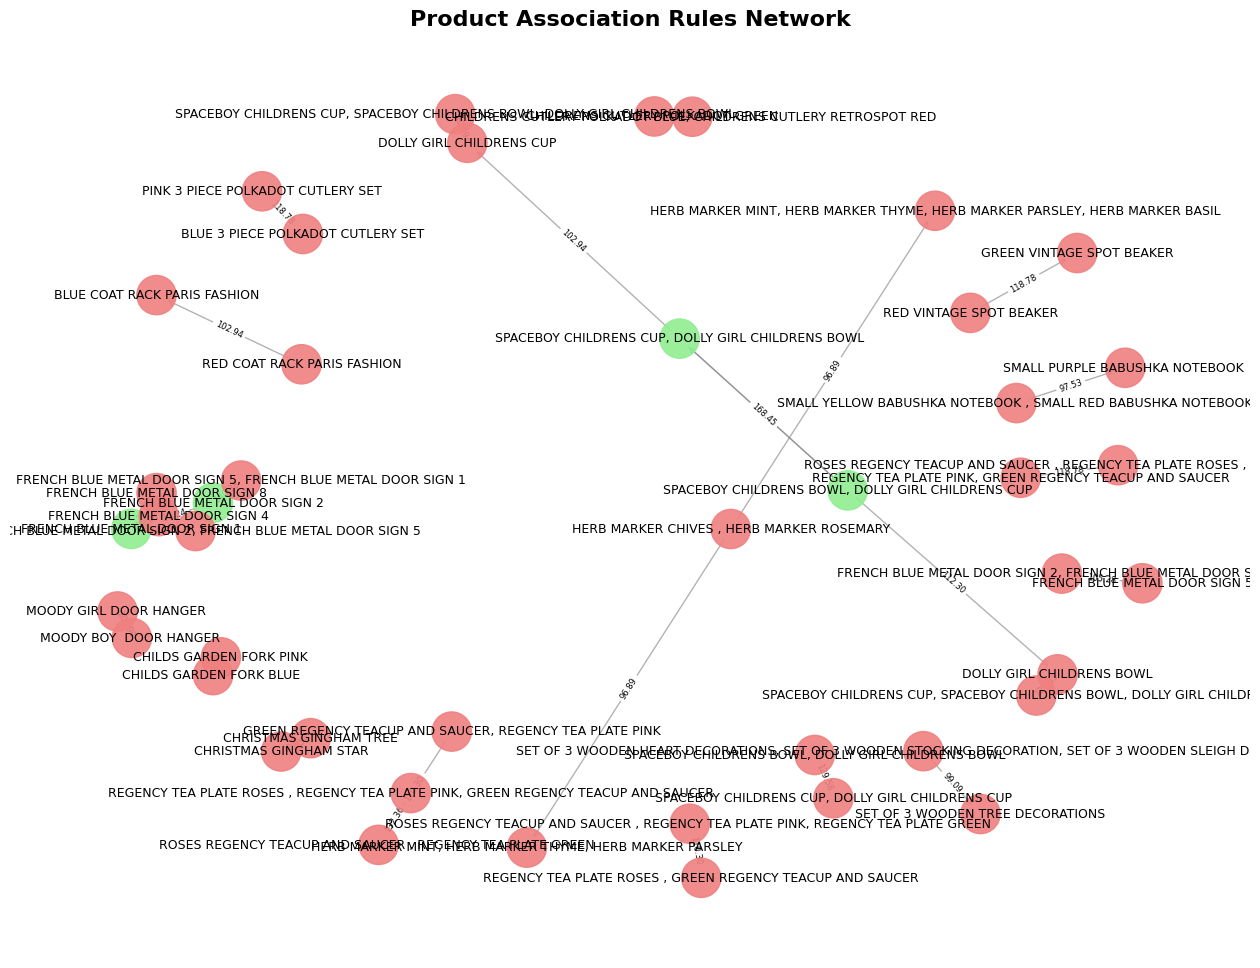

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

def visualize_product_network(rules_df, lift_threshold=1.5, confidence_threshold=0.7, top_edges=50):
    filtered_rules = rules_df[(rules_df['lift'] > lift_threshold) & (rules_df['confidence'] > confidence_threshold)]

    G = nx.DiGraph()
    for _, row in filtered_rules.iterrows():
        G.add_edge(
            ', '.join(list(row['antecedents'])),
            ', '.join(list(row['consequents'])),
            weight=row['lift']
        )

    edges_sorted = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:top_edges]
    G = nx.DiGraph(edges_sorted)

    pos = nx.spring_layout(G, k=0.8, seed=42)

    node_color_map = []
    for node in G.nodes:
        cluster_degree = len(list(G.successors(node))) + len(list(G.predecessors(node)))
        if cluster_degree > 5:
            node_color_map.append(to_rgba('skyblue', 0.9))
        elif cluster_degree > 2:
            node_color_map.append(to_rgba('lightgreen', 0.8))
        else:
            node_color_map.append(to_rgba('lightcoral', 0.8))

    plt.figure(figsize=(16, 12))
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color=node_color_map, alpha=0.9)
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray', alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=9, font_color='black')

    edge_labels = { (u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True) }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

    plt.title("Product Association Rules Network", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.show()

visualize_product_network(rules_fp, lift_threshold=1.5, confidence_threshold=0.8, top_edges=30)


**Recommendation Engine**

In [17]:
# Recommendation based on input products
def recommend_products(input_products, rules, num_recommendations=5):
    recommendations = set()

    for product in input_products:
        related_rules = rules[rules['antecedents'].apply(lambda x: product in x)]
        related_rules = related_rules.sort_values(by='lift', ascending=False)
        for _, rule in related_rules.head(num_recommendations).iterrows():
            recommendations.update(rule['consequents'])
    return recommendations - input_products

# Example
input_products = {'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT'}
recommended_products = recommend_products(input_products, rules_fp)  # use rules_fp instead of rules
print("Recommended Products:", recommended_products)

Recommended Products: {'JUMBO BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT', 'JUMBO BAG APPLES', 'LUNCH BAG DOLLY GIRL DESIGN', 'PACK OF 60 SPACEBOY CAKE CASES', 'PACK OF 60 DINOSAUR CAKE CASES', 'SMALL WHITE HEART OF WICKER', 'LUNCH BAG PINK POLKADOT', 'RECIPE BOX RETROSPOT ', 'LUNCH BAG SPACEBOY DESIGN '}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Considering Seasonality and Trends**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


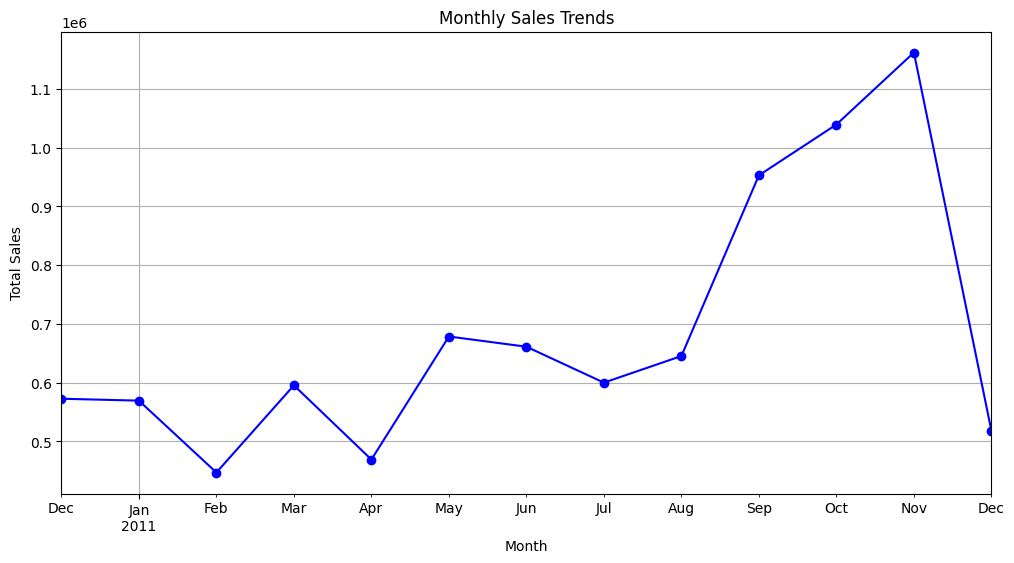

In [18]:
# Grouping sales data by month to analyze trends
data['Month'] = pd.to_datetime(data['InvoiceDate']).dt.to_period('M')
monthly_sales = data.groupby('Month')['TotalSales'].sum()

# Plotting sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

**Scalability for Large Datasets**

In [19]:
import pandas as pd
from openpyxl import load_workbook

chunk_size = 100000
workbook = load_workbook(dataset_path, read_only=True)
sheet = workbook.active

chunk_start = 0
while chunk_start < sheet.max_row:
    chunk_end = min(chunk_start + chunk_size, sheet.max_row)
    chunk_data = pd.read_excel(dataset_path, sheet_name=sheet.title, skiprows=chunk_start, nrows=chunk_end - chunk_start)
    print(f"Missing values in chunk:\n{chunk_data.isnull().sum()}")
    chunk_start = chunk_end


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing values in chunk:
InvoiceNo          0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     34915
Country            0
dtype: int64
Missing values in chunk:
544796                             0
85086A                             0
CANDY SPOT HEART DECORATION      491
6                                  0
2011-02-23 13:37:00                0
0.85                               0
16208                          23099
United Kingdom                     0
dtype: int64
Missing values in chunk:
554108                                 0
84279B                                 0
CHERRY BLOSSOM DECORATIVE FLASK      319
2                                      0
2011-05-22 14:29:00                    0
3.75                                   0
13668                              26079
United Kingdom                         0
dtype: int64
Missing values in chunk:
563189                     0
23298                      0
SPOTTY BUNT

In [22]:
# Saving preprocessed data and rules
data.to_csv("/content/preprocessed_data.csv", index=False)
rules_fp.to_csv("/content/association_rules.csv", index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
